# Exercise 13-1: Another analysis of the Fires data

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as geo

## Get the data

In [2]:
df = pd.read_pickle('fires_clean.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274123 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128667 non-null  object        
 1   acres_burned    274123 non-null  float64       
 2   state           274123 non-null  object        
 3   latitude        274123 non-null  float64       
 4   longitude       274123 non-null  float64       
 5   fire_year       274123 non-null  int64         
 6   discovery_date  274123 non-null  datetime64[ns]
 7   contain_date    137376 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.8+ MB


## Clean and prepare the data

In [4]:
# filter the data so it only contains fires for Alaska. Hint: the abbreviation for Alaska is AK

df = df[df['state'] == 'AK']


In [5]:
df

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
4628,Sheridan Glacier Fir,11.4,AK,60.506111,-145.343889,2005,2005-05-01,2005-05-02
6656,Muskeg,305.0,AK,59.087222,-135.441389,2005,2005-04-29,2005-05-06
41201,Seattle Creek,10.0,AK,60.873889,-149.120556,2009,2009-09-19,2009-11-23
53190,None,40.0,AK,60.500000,-149.866667,1992,1992-05-12,1992-05-13
75402,None,27.0,AK,57.918333,-134.956667,1993,1993-08-18,1993-08-20
...,...,...,...,...,...,...,...,...
1805259,Sinona Creek,257.6,AK,62.877150,-144.858267,2015,2015-06-24,2015-07-21
1805260,Goodpaster Valley,1000.0,AK,64.361555,-144.959527,2015,2015-06-20,NaT
1805262,Healy River,604.2,AK,63.966666,-144.576500,2015,2015-06-20,2015-08-23
1856890,Kokwok River,1825.0,AK,59.607750,-158.254194,2015,2015-06-20,2015-08-12


In [6]:
# filter the data so it only contains fires that burned at least 90 days and at least 100 acres


# Calculate the duration of each fire by creating a new column
df['days_burning'] = (df.contain_date - df.discovery_date).dt.days



# Filter the DataFrame to include only fires with duration >= 90 days and acres burned >= 100
df = df.query('days_burning >= 90 and acres_burned >= 100')



In [7]:
df

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,days_burning
210516,332248,36250.0,AK,65.799500,-149.719200,1993,1993-06-04,1993-09-03,91.0
210546,3322292,47494.0,AK,66.116400,-142.869200,1993,1993-06-06,1993-09-08,94.0
210831,404275,43329.7,AK,62.782700,-155.419000,1994,1994-06-13,1994-09-22,101.0
210855,412312,22420.0,AK,63.832900,-145.285600,1994,1994-06-14,1994-10-04,112.0
211030,Gal Ne 76,2780.0,AK,65.832800,-155.369300,1995,1995-07-16,1995-10-16,92.0
...,...,...,...,...,...,...,...,...,...
1804903,15449 Sushgitit Hills,276038.1,AK,65.801162,-153.470071,2015,2015-06-21,2015-09-29,100.0
1804904,15579 Totson,4223.7,AK,64.473167,-157.292028,2015,2015-06-22,2015-09-28,98.0
1804999,Hickey Creek,33131.0,AK,62.624555,-157.597750,2015,2015-06-20,2015-09-21,93.0
1805072,Rock Creek,9178.0,AK,61.186833,-154.635666,2015,2015-06-23,2015-09-21,90.0


In [8]:
# find the outliers in the days_burning column

df.days_burning.describe(percentiles=[.25,.50,.75,.90,.95])

count     235.000000
mean      111.531915
std        66.788815
min        90.000000
25%        97.000000
50%       103.000000
75%       113.500000
90%       127.000000
95%       142.300000
max      1101.000000
Name: days_burning, dtype: float64

<Axes: >

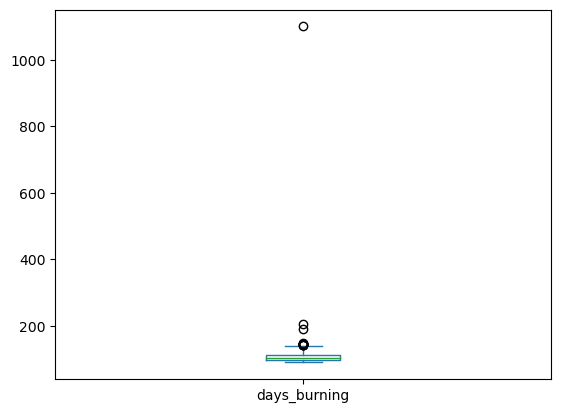

In [9]:
df.days_burning.plot.box()

In [10]:
# filter the data to remove rows that have outliers in the days_burning column
df = df.query('days_burning <= 200')


In [11]:
# display the first five rows
df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,days_burning
210516,332248,36250.0,AK,65.7995,-149.7192,1993,1993-06-04,1993-09-03,91.0
210546,3322292,47494.0,AK,66.1164,-142.8692,1993,1993-06-06,1993-09-08,94.0
210831,404275,43329.7,AK,62.7827,-155.4190,1994,1994-06-13,1994-09-22,101.0
210855,412312,22420.0,AK,63.8329,-145.2856,1994,1994-06-14,1994-10-04,112.0
211030,Gal Ne 76,2780.0,AK,65.8328,-155.3693,1995,1995-07-16,1995-10-16,92.0


## Plot the data

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


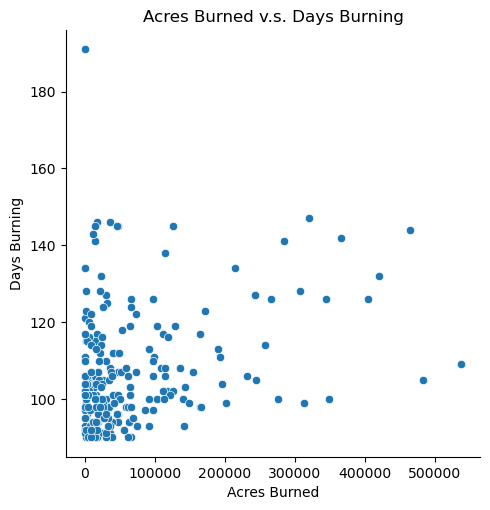

In [12]:
# create a scatterplot that compares acres burned with days burning
# add a title for the plot and labels for the x and y axes


g = sns.relplot(data=df, x='acres_burned', y='days_burning')

for ax in g.axes.flat:
    ax.set(title='Acres Burned v.s. Days Burning', 
           ylabel='Days Burning', xlabel='Acres Burned')

In [ ]:
# use Geopandas to read the shapes of the maps for the United States
usa = geo.read_file('States_shapefile.shp')

In [ ]:
# plot an outline of the map of Alaska

ak_map = usa[usa.STATE_ABBR == 'AK']

In [ ]:
# plot the fires on the outline map with Seaborn

ak_map.plot(color='white', edgecolor='black')

In [ ]:
# increase the size of the plot

ak_map.plot(color='white', edgecolor='black')
ax = sns.scatterplot(data=fires, x='longitude', y='latitude')

In [ ]:
# modify the plot to change dot color with the number of days the fire has been burning

# increase the size on the plot from the previous cell
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude')

In [ ]:
# modify the plot to use shades of red for the dot color
# modify the map so that the color of the dots changes with length of the fire
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude', hue='days_burning')


In [ ]:
# modify the plot to change the size of the dots depending on the number of days burning
# modify the color of the dots to use a reversed gradient colormap 
# hint: remember that you can reverse a colormap by adding _r to the colormap name
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude', hue='days_burning', palette='flare')


In [ ]:
# modify the map so that the acres burned will control the size of the dots
ak_map.plot(color='white', edgecolor='black', figsize=(16,8))
ax = sns.scatterplot(data=fires, x='longitude', y='latitude', 
                     hue='days_burning', palette='flare', 
                     size='days_burning', sizes=(10,200))